In [ ]:
# Install Packages
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.1

In [ ]:
! pip install prophet

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Viz
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib import pyplot as plt
import seaborn as sns

# Sklearn
from sklearn import model_selection, metrics

# Models
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model, ensemble
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
# Data Loading
! pip install kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# download data
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting

# unzip data
! mkdir /content/walmart-recruiting-store-sales-forecasting
! unzip /content/walmart-recruiting-store-sales-forecasting.zip -d /content/walmart-recruiting-store-sales-forecasting

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 163MB/s]
mkdir: cannot create directory ‘/content/walmart-recruiting-store-sales-forecasting’: File exists
Archive:  /content/walmart-recruiting-store-sales-forecasting.zip
  inflating: /content/walmart-recruiting-store-sales-forecasting/features.csv.zip  
  inflating: /content/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip  
  inflating: /content/walmart-recruiting-store-sales-forecasting/stores.csv  
  inflating: /content/walmart-recruiting-store-sales-forecasting/test.csv.zip  
  inflating: /content/walmart-recruiting-store-sales-forecasting/train.csv.zip  


In [ ]:
# Read Data
features = pd.read_csv('/content/walmart-recruiting-store-sales-forecasting/features.csv.zip')
stores = pd.read_csv('/content/walmart-recruiting-store-sales-forecasting/stores.csv')
train = pd.read_csv('/content/walmart-recruiting-store-sales-forecasting/train.csv.zip')
test = pd.read_csv('/content/walmart-recruiting-store-sales-forecasting/test.csv.zip')

### **Hands-On Objective**: For every row in the test set, which consists of a combination of store, department, and date, our task is to predict the weekly sales for that particular department.

# **Stores**



1.   Investigate the metadata of the stores.
2.   Identify the total count of stores and understand their classification based on parameters such as type and size.


In [ ]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

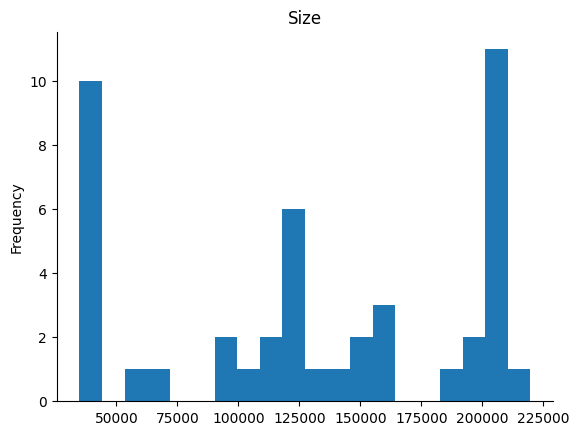

In [ ]:
# Viz on Stores
stores['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

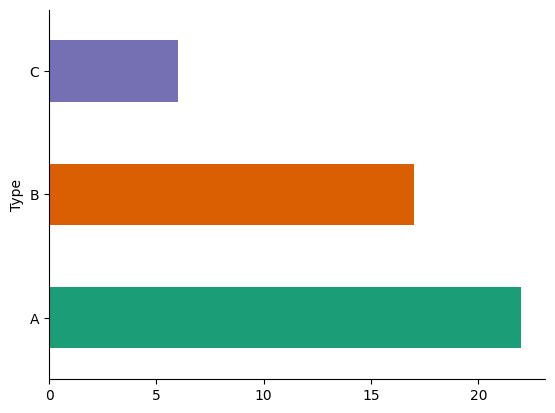

In [ ]:
stores.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

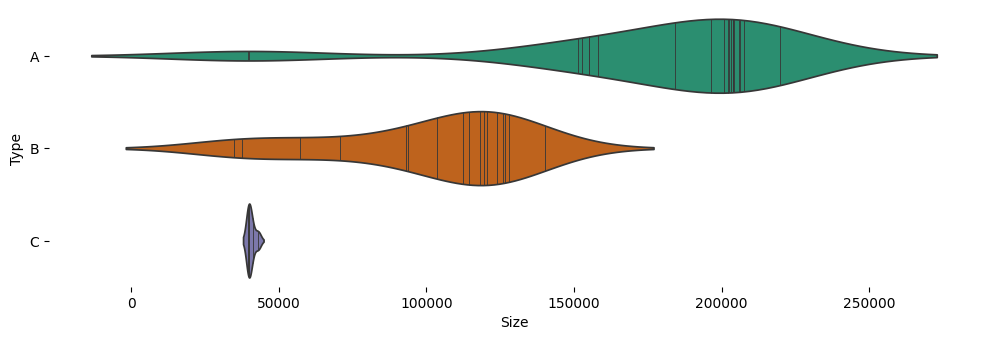

In [ ]:
figsize = (12, 1.2 * len(stores['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(stores, x='Size', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Features**

1. Analyze the data related to the features.
2. Explore the nature of the metadata provided for each store. Research how different elements such as economic and environmental factors, along with promotional discounts, are distributed.

In [ ]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

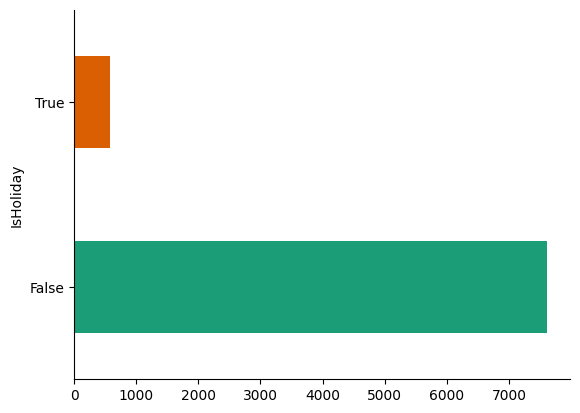

In [ ]:
features.groupby('IsHoliday').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

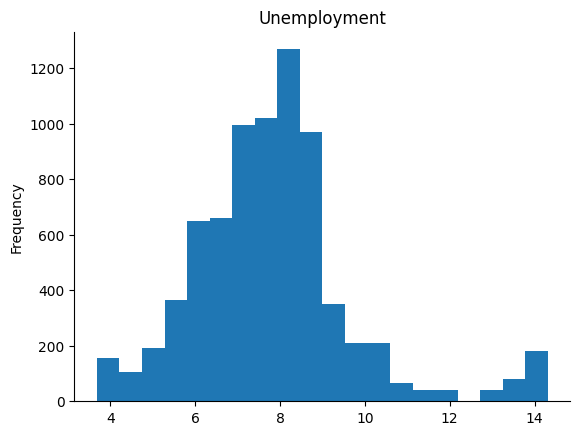

In [ ]:
features['Unemployment'].plot(kind='hist', bins=20, title='Unemployment')
plt.gca().spines[['top', 'right',]].set_visible(False)

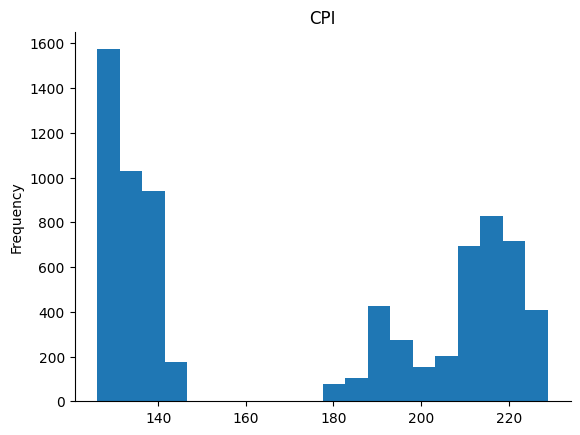

In [ ]:
features['CPI'].plot(kind='hist', bins=20, title='CPI')
plt.gca().spines[['top', 'right',]].set_visible(False)

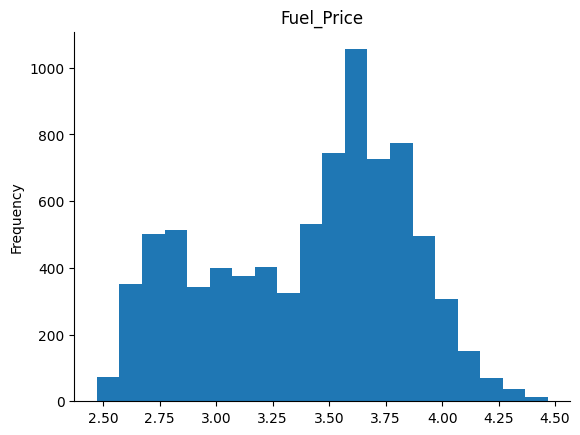

In [ ]:
features['Fuel_Price'].plot(kind='hist', bins=20, title='Fuel_Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

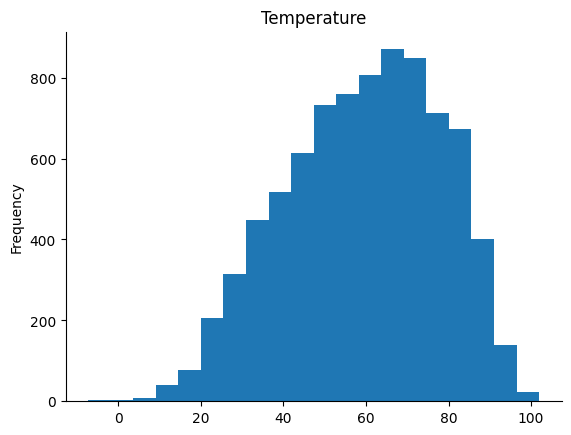

In [ ]:
features['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Train Data**

In [ ]:
train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [ ]:
train.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

# **Merge Data**

1. Combine all metadata, features, and sales data from various stores into a single dataset.
2. This comprehensive dataset will aid in understanding the relationship between sales at the store-department level and various metadata factors such as economic and environmental conditions, promotional events, and temporal aspects like weeks, days, months, and years.

In [ ]:
# merge store meta data and other features
feature_store = features.merge(stores, how='inner', on = "Store")


# Converting date column to datetime
feature_store['Date'] = pd.to_datetime(feature_store['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Adding some basic datetime features
feature_store['Day'] = feature_store['Date'].dt.day
feature_store['Week'] = feature_store['Date'].dt.isocalendar().week #dt.week
feature_store['Month'] = feature_store['Date'].dt.month
feature_store['Year'] = feature_store['Date'].dt.year

In [ ]:
feature_store.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        NaN        NaN  211.096358         8.106      False    A  151315   
1        NaN        NaN  211.242170         8.106       True    A  151315   
2        NaN        NaN  211.289143         8.106      False    A  151315   
3        NaN        NaN  211.319643         8.106      False    A  151315   
4        NaN        NaN  211.350143         8.106      False    A  151315   

   Day  Week  Month  Year  
0    5     5      2  2010  
1   12     6      2  2010  
2   19     7      2  2010  
3   26     8      2  2010  
4    5     9      3  2010

In [ ]:
# Merge with train and test Data
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
train_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  Day  Week  Month  Year  
0         8.106    A  151315    5     5      2  2010  
1         8.106    A  151315   12     6      2  2010  
2         8.106    A  151315   19     7      2  2010  
3         8.106    A  151315   26     8      2  2010  
4         8.106    A  151315    5     9      3  2010

In [ ]:
test_df.head()

Store  Dept       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      1     1 2012-11-02      False        55.32       3.386    6766.44   
1      1     1 2012-11-09      False        61.24       3.314   11421.32   
2      1     1 2012-11-16      False        52.92       3.252    9696.28   
3      1     1 2012-11-23       True        56.23       3.211     883.59   
4      1     1 2012-11-30      False        52.34       3.207    2460.03   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment Type  \
0    5147.70      50.82    3639.90    2737.42  223.462779         6.573    A   
1    3370.89      40.28    4646.79    6154.16  223.481307         6.573    A   
2     292.10     103.78    1133.15    6612.69  223.512911         6.573    A   
3       4.17   74910.32     209.91     303.32  223.561947         6.573    A   
4        NaN    3838.35     150.57    6966.34  223.610984         6.573    A   

     Size  Day  Week  Month  Year  
0  151315    2    44     11  2012  
1  151315    9    45     11  2012  
2  151315   16    46     11  2012  
3  151315   23    47     11  2012  
4  151315   30    48     11  2012

In [ ]:
train_df["Date"].min(),train_df["Date"].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
test_df["Date"].min(),test_df["Date"].max()

(Timestamp('2012-11-02 00:00:00'), Timestamp('2013-07-26 00:00:00'))

In [ ]:
train_df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
test_df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
np.sort(train_df["Dept"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
np.sort(test_df["Dept"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

# **Sales-Feature EDA**

In [ ]:
df_weeks = train_df.drop(columns = "Date").groupby('Week').sum()

In [ ]:
df_weeks.head()

Store    Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Week                                                                     
1     130899  260501  8.773121e+07          0    222343.25   18872.529   
2     131036  260045  8.269676e+07          0    204005.74   19098.337   
3     130031  259381  8.273564e+07          0    222547.92   19167.202   
4     129971  259111  7.943483e+07          0    221326.56   19229.283   
5     195904  392036  1.419895e+08          0    317172.19   27489.729   

         MarkDown1    MarkDown2  MarkDown3    MarkDown4    MarkDown5  \
Week                                                                   
1     1.499397e+07  67007392.71  353486.72   3078155.61  15506769.87   
2     1.019858e+07  29235314.34  218513.27   1565390.83  11416226.10   
3     7.210967e+06   9824350.22  214079.04   1942054.54   8410008.53   
4     4.418107e+06   5170160.65  213215.80    296603.35   7927497.89   
5     1.140734e+08   8936033.33  448553.25  90821661.61  18580144.27   

               CPI  Unemployment  \
Week                               
1     1.008962e+06     46396.361   
2     1.007821e+06     46330.934   
3     1.006852e+06     46151.605   
4     1.006330e+06     46135.250   
5     1.507341e+06     71739.976   

                                                   Type        Size     Day  \
Week                                                                          
1     AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...   806775433   38348   
2     AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...   805424262   79550   
3     AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...   804330161  120458   
4     AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...   803454747  161436   
5     AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  1213767653   35410   

      Month      Year  
Week                   
1      5903  11873906  
2      5894  11855800  
3      5877  11821606  
4      5871  11809533  
5     17716  17813460

In [ ]:
plot_fig = px.line(data_frame=df_weeks, x=df_weeks.index, y='Weekly_Sales',
                   template='plotly_dark',
                   labels={'Weekly_Sales' : 'Aggregate Sales', 'x' : 'Week Count'})

# Define the chart layout
chart_layout = dict(layout=go.Layout(font=dict(family="Arial", size=14)))

# Update the chart layout and title
plot_fig.update_layout(
    template=chart_layout,
    title={'text':'<b>Yearly Sales Trend per Week</b>', 'x': 0.1},
    xaxis=dict(tickmode='auto', showline=True, linecolor='white'),
    yaxis=dict(showline=True, linecolor='white'))

# Add an annotation to the chart
plot_fig.add_annotation(
    x=0, y=-0.25,
    align='right',
    font=dict(size=14),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False,
    text="Note: Sales data is aggregated weekly")

In [ ]:
legend_mapping = {'MarkDown1': "Discount 1",
                  'MarkDown2': 'Discount 2',
                  'MarkDown3': 'Discount 3',
                  'MarkDown4': 'Discount 4',
                  'MarkDown5': 'Discount 5',
                  'Weekly_Sales': 'Sales'}

color_palettes = {
    'sequential': {'purples': ['#10002B', '#240046', '#3C096C', '#5A189A', '#7B2CBF', '#9D4EDD', '#C77DFF', '#E0AAFF'],
                   'oranges': ['#FF6701', '#FF8501', '#FFA501', '#FFC300', '#FFEA56', '#FFF689', '#FFFFC1']}
}

plot_fig = px.line(df_weeks, x=df_weeks.index, y=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales'],
                   color_discrete_sequence=color_palettes['sequential']['oranges'],
                   template='plotly_dark',
                   labels={'value' : 'Aggregate Sales', 'x' : 'Week Count'})

for trace_idx, trace in enumerate(plot_fig.data):
    trace.name = legend_mapping[trace.name]

chart_layout = dict(layout=go.Layout(font=dict(family="Arial", size=14)))

plot_fig.update_layout(
    template=chart_layout,
    title={'text':'<b>Discounts vs Sales</b><br><sup>Yearly Impact of Discounts on Total Sales </sup>', 'x': 0.1},
    legend_title_text='<b>Discounts & Sales</b>',
    xaxis=dict(tickmode='auto', showline=True, linecolor='white'),
    yaxis=dict(showline=True, linecolor='white'))

plot_fig.add_annotation(
    x=0, y=-0.25,
    align='right',
    font=dict(size=14),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False,
    text="Note: Sales data is aggregated weekly")

In [ ]:
# Weekly Sales Across Different Year
weekly_sales = train_df.groupby(['Year','Week'], as_index = False).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = train_df.loc[train_df['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = train_df.loc[train_df['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = train_df.loc[train_df['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

weekly_sales_data = {
    '2010': weekly_sales2010['Weekly_Sales']['mean'].to_dict(),
    '2011': weekly_sales2011['Weekly_Sales']['mean'].to_dict(),
    '2012': weekly_sales2012['Weekly_Sales']['mean'].to_dict()
}

weekly_sales_df = pd.DataFrame(weekly_sales_data)

In [ ]:
line_cols = ['2010', '2011', '2012']

# Sort the weekly sales data frame by index
sorted_weekly_sales_df = weekly_sales_df.sort_index()

# Change color palette
color_palettes = {
    'sequential': {'reds': ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7'],
                   'blues': ['#053061', '#2166ac', '#4393c3', '#92c5de', '#d1e5f0']}
}

# Create a line chart with the sorted data
chart_fig = px.line(sorted_weekly_sales_df, x=sorted_weekly_sales_df.index, y=line_cols,
                    labels={'x': 'Weekly Count', 'value': 'Aggregate Sales'},
                    color_discrete_sequence=color_palettes['sequential']['reds'])

# Define the chart layout
chart_layout = dict(layout=go.Layout(font=dict(family="Arial", size=14)))

# Update the chart layout and title
chart_fig.update_layout(
    template=chart_layout,
    margin=dict(b=100),
    title={'text':'<b>Yearly Sales Trend per Week<b><br><sup>Comparison among 2010, 2011, and 2012</sup>', 'x': 0.1}, xaxis_title='Week',
    legend_title_text='<b>Year</b>',
    xaxis=dict(tickmode='auto', showline=True, linecolor='white'),
    yaxis=dict(showline=True, linecolor='white'))

# Add annotations for Thanksgiving and Christmas
chart_fig.add_annotation(
    x=47, y=26000,
    text="<b>Thanksgiving</b>",
    bordercolor="#808080",
    showarrow=False,
    borderpad=3,
    bgcolor='white')

chart_fig.add_annotation(
    x=51, y=30000,
    text="<b>Christmas</b>",
    bordercolor="#808080",
    showarrow=False,
    borderpad=3,
    bgcolor='white')

# Add an annotation at the bottom of the chart
chart_fig.add_annotation(
    x=0, y=-0.3,
    align='right',
    font=dict(size=14),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False,
    text="Note: Sales data is aggregated weekly")

In [ ]:
# Converting the temperature to celsius for a better interpretation
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
train_plt = train_df.sample(frac=.1, random_state=42)

In [ ]:
palletes = {
   'continuos':{'blues': ['#03045E', '#023E8A', '#0077B6', '#0077B6', '#0096C7', '#00B4D8', '#48CAE4', '#90E0EF', '#ADE8F4', '#CAF0F8'],
                'green_n_blues': ['#D9ED92', '#B5E48C', '#99D98C', '#76C893', '#52B69A', '#34A0A4', '#168AAD', '#1A759F', '#1E6091', '#184E77']
               }
            }

template = dict(layout=go.Layout(font=dict(family="Enriqueta", size=12)))

fig = px.histogram(train_plt, x='Temperature', y='Weekly_Sales', color='IsHoliday', marginal='box', opacity=0.55,
                   facet_col='IsHoliday', facet_col_spacing=0.05,
                   color_discrete_sequence=palletes['continuos']['blues'])

fig.update_layout(
    template=template,
    title={'text':'<b>Behaviour of Temperature and Sales by Holiday<br><sup>Is Temperature a key factor in determining Sales?</sup>', 'x': 0.075},
    yaxis_title='Total Sales', xaxis_title=' ',
    legend_title_text='<b>Holidays</b>',
    legend=dict(orientation="h", yanchor="top", x=0.7, y=1.2))

fig.for_each_xaxis(
    lambda x: x.update(title=''))

fig.add_annotation(
    x=0.5, y=-0.125,
    align='center',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False,
    text="<span style='font-size:16px;'>Temperature<sup><b> (celsius)</b>")

fig.add_annotation(
    x=0, y=-0.225,
    align='left',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False)

In [ ]:
fig=px.histogram(train_plt, x='Fuel_Price', y ='Weekly_Sales', color='IsHoliday', marginal='box', opacity= 0.55,
                 facet_col='IsHoliday', facet_col_spacing=0.05,
                 color_discrete_sequence=palletes['continuos']['blues'])

fig.update_layout(template=template,
                  title={'text':'<b>Fuel Price behaviour and Sales by Holiday</b><br><sup>Is Fuel Price causing an impact on Sales?</sup>', 'x': 0.075},
                  yaxis_title='Total Sales', xaxis_title='',
                  legend_title_text='<b>Holidays</b>',
                  legend=dict(orientation="h", yanchor="top", x=0.7, y=1.2))

fig.for_each_xaxis(
    lambda x: x.update(title=''))

fig.for_each_annotation(
    lambda x: x.update(text=''))

fig.add_annotation(
    x=0.5, y=-0.125,
    align='center',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False,
    text="<span style='font-size:16px;'>Fuel Price")

fig.add_annotation(
    x=0, y=-0.225,
    align='left',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False)

In [ ]:
fig = px.histogram(train_plt, x='CPI', y ='Weekly_Sales', color='IsHoliday', marginal='box', opacity= 0.55,
                   facet_col='IsHoliday', facet_col_spacing=0.05,
                   title='CPI and sales by holiday',color_discrete_sequence=palletes['continuos']['blues'])

fig.update_layout(
    template=template,
    title={'text':'<b>Inflation (CPI) impact in Sales by Holiday</b><br><sup>The rise in consumer prices afect Sales?</sup>', 'x': 0.075},
    yaxis_title='Total Sales', xaxis_title='',
    legend_title_text='<b>Holidays</b>',
    legend=dict(orientation="h", yanchor="top", x=0.7, y=1.2))

fig.for_each_xaxis(
    lambda x: x.update(title=''))

fig.for_each_annotation(
    lambda x: x.update(text=''))

fig.add_annotation(
    x=0.5, y=-0.125,
    align='center',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False,
    text="<span style='font-size:16px;'>Consumer Price Index")

fig.add_annotation(
    x=0, y=-0.225,
    align='left',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False)

In [ ]:
fig = px.histogram(train_plt, x='Unemployment', y ='Weekly_Sales', color='IsHoliday', marginal='box', opacity= 0.6,
                   facet_col='IsHoliday', facet_col_spacing=0.05,
                   color_discrete_sequence=palletes['continuos']['blues'])

fig.update_layout(
    template=template,
    title={'text':'<b>Unemployment Rate and Sales by Holiday</b><br><sup>How Unemployment afect Sales?</sup>', 'x': 0.075},
    yaxis_title='Total Sales', xaxis_title='',
    legend_title_text='<b>Holidays</b>',
    legend=dict(orientation="h", yanchor="top", x=0.7, y=1.2))

fig.for_each_xaxis(
    lambda x: x.update(title=''))

fig.for_each_annotation(
    lambda x: x.update(text=''))

fig.add_annotation(
    x=0.5, y=-0.125,
    align='center',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False,
    text="<span style='font-size:16px;'>Unemployment Rate")

fig.add_annotation(
    x=0, y=-0.225,
    align='left',
    font=dict(size=12),
    textangle=0,
    xref="paper",
    yref="paper",
    showarrow=False)

# **Sales-Store EDA**

In [ ]:
# Calculate the average weekly sales for each store size
avg_sales_by_size = train_plt[["Size","Weekly_Sales"]].groupby('Size').mean()

# Create a line chart
fig = px.line(avg_sales_by_size,
              x=avg_sales_by_size.index,
              y=avg_sales_by_size.Weekly_Sales,
              template='ggplot2',
              labels={'Weekly_Sales':'Average Sales', 'Size':'Size of Store'})

# Update chart layout and title
fig.update_layout(
    title={'text':'<b>Average Sales Based on Store Size</b>', 'x':0.1},
    yaxis=dict(showline=True, linecolor='darkblue', linewidth=2))

# Add a note at the bottom of the chart
fig.add_annotation(
    x=0, y=-0.25,
    text='Note: Store size',
    showarrow=False,
    font=dict(size=12, color='green'),
    xref="paper",
    yref="paper",
    align='left')

In [ ]:
depts = train_plt[["Dept","Weekly_Sales"]].groupby('Dept').mean().sort_values(by='Weekly_Sales', ascending=False)

fig = px.bar(depts, x=depts.index, y=depts.Weekly_Sales, color=depts.Weekly_Sales,
             color_continuous_scale=palletes['continuos']['green_n_blues'])

fig.update_layout(
    template=template,
    title={'text':'<b>Sales across Departaments</b>', 'x': 0.075},
    legend_title_text='<b>Sales</b>',
    yaxis=dict(showline=True))

In [ ]:
# Calculate correlation matrix
correlation = train_df[['Weekly_Sales', 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
 'Size']].corr()
# Create mask for the upper triangle
upper_triangle_mask = np.triu(np.ones_like(correlation, dtype=bool))
# Apply the mask and round the values
masked_correlation = correlation.mask(upper_triangle_mask).round(2)

# Create an annotated heatmap
heatmap = ff.create_annotated_heatmap(z=masked_correlation.values,
                                      x=masked_correlation.columns.to_list(),
                                      y=masked_correlation.columns.to_list(),
                                      colorscale=palletes['continuos']['green_n_blues'],
                                      hoverinfo="skip",
                                      showscale=True, ygap=1, xgap=1)

# Update x axes
heatmap.update_xaxes(side="bottom")

# Update layout
heatmap.update_layout(
    template='seaborn',
    width=900,
    height=700,
    margin=dict(l=100),
    title={'text':'<b>Correlation of Features (Heatmap)</b>', 'x': 0.075},
    title_x=0.5,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
)

# Replace 'nan' annotations with an empty string
for i in range(len(heatmap.layout.annotations)):
    if heatmap.layout.annotations[i].text == 'nan':
        heatmap.layout.annotations[i].text = ""

heatmap.show()

In [ ]:
sales_weekly_correlation = train_df[['Weekly_Sales', 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
 'Size']].corr()
sales_weekly_correlation.head()

Weekly_Sales  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Weekly_Sales      1.000000    -0.002312   -0.000120   0.085251   0.024130   
Temperature      -0.002312     1.000000    0.143859  -0.040594  -0.323927   
Fuel_Price       -0.000120     0.143859    1.000000   0.061371  -0.220895   
MarkDown1         0.085251    -0.040594    0.061371   1.000000   0.024486   
MarkDown2         0.024130    -0.323927   -0.220895   0.024486   1.000000   

              MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  \
Weekly_Sales   0.060385   0.045414   0.090362 -0.020921     -0.025864   
Temperature   -0.096880  -0.063947  -0.017544  0.182112      0.096730   
Fuel_Price    -0.102092  -0.044986  -0.128065 -0.164210     -0.033853   
MarkDown1     -0.108115   0.819238   0.160257 -0.055558      0.050285   
MarkDown2     -0.050108  -0.007768  -0.007440 -0.039534      0.020940   

                  Size  
Weekly_Sales  0.243828  
Temperature  -0.058313  
Fuel_Price    0.003361  
MarkDown1     0.345673  
MarkDown2     0.108827

In [ ]:
# Compute the correlation of weekly sales
sales_weekly_correlation = sales_weekly_correlation.loc["Weekly_Sales",:]
# Create a DataFrame and sort the values in descending order
correlation_df = pd.DataFrame(data = sales_weekly_correlation, index = sales_weekly_correlation.index).sort_values(by='Weekly_Sales', ascending=False)
# Drop the first row
correlation_df = correlation_df.iloc[1:]

# Generate a bar chart
bar_chart = px.bar(correlation_df, x=correlation_df.index, y='Weekly_Sales', color=correlation_df.index, labels={'index':'Attributes'},
                   color_discrete_sequence=palletes['continuos']['blues'])

# Update traces to hide legend
bar_chart.update_traces(showlegend=False)

# Update the layout of the chart
bar_chart.update_layout(
    template='seaborn',
    title={'text':'<b>Correlation of Attributes with Sales</b>', 'x': 0.075},
    yaxis_title='Increase in Sales',
    yaxis=dict(showline=True))

# **Feature Engineering**

- The most crucial step in any data science modelling process is feature engineering.
- The current problem is a time series problem, which we will address as a regression problem.
- Comprehensive feature engineering is necessary.
- Temporal dependencies in time series data need to be captured through feature engineering.
- Based on EDA observations, holidays and promotional events impact sales, hence features related to holidays should be developed.
- Data cleaning and formatting are also vital parts of the feature engineering stage.

In [ ]:
data_train = train_df.copy()
data_test = test_df.copy()

In [ ]:
# Incoprporating Thanksgiving and Christmas
data_train['Days_to_Thansksgiving'] = (pd.to_datetime(train_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data_train['Days_to_Christmas'] = (pd.to_datetime(train_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

data_test['Days_to_Thansksgiving'] = (pd.to_datetime(test_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data_test['Days_to_Christmas'] = (pd.to_datetime(test_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [ ]:
# Incoprporating Other Important Holidays
data_train['SuperBowlWeek'] = train_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_train['LaborDay'] = train_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_train['Tranksgiving'] = train_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_train['Christmas'] = train_df['Week'].apply(lambda x: 1 if x == 52 else 0)


data_test['SuperBowlWeek'] = test_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_test['LaborDay'] = test_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_test['Tranksgiving'] = test_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_test['Christmas'] = test_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [ ]:
data_train['MarkdownsSum'] = train_df['MarkDown1'] + train_df['MarkDown2'] + train_df['MarkDown3'] + train_df['MarkDown4'] + train_df['MarkDown5']
data_test['MarkdownsSum'] = test_df['MarkDown1'] + test_df['MarkDown2'] + test_df['MarkDown3'] + test_df['MarkDown4'] + test_df['MarkDown5']

In [ ]:
data_train.isnull().sum()

Store                         0
Dept                          0
Date                          0
Weekly_Sales                  0
IsHoliday                     0
Temperature                   0
Fuel_Price                    0
MarkDown1                270889
MarkDown2                310322
MarkDown3                284479
MarkDown4                286603
MarkDown5                270138
CPI                           0
Unemployment                  0
Type                          0
Size                          0
Day                           0
Week                          0
Month                         0
Year                          0
Days_to_Thansksgiving         0
Days_to_Christmas             0
SuperBowlWeek                 0
LaborDay                      0
Tranksgiving                  0
Christmas                     0
MarkdownsSum             324514
dtype: int64

In [ ]:
data_test.isnull().sum()

Store                        0
Dept                         0
Date                         0
IsHoliday                    0
Temperature                  0
Fuel_Price                   0
MarkDown1                  149
MarkDown2                28627
MarkDown3                 9829
MarkDown4                12888
MarkDown5                    0
CPI                      38162
Unemployment             38162
Type                         0
Size                         0
Day                          0
Week                         0
Month                        0
Year                         0
Days_to_Thansksgiving        0
Days_to_Christmas            0
SuperBowlWeek                0
LaborDay                     0
Tranksgiving                 0
Christmas                    0
MarkdownsSum             37457
dtype: int64

In [ ]:
data_train.fillna(0, inplace = True)

data_test['CPI'].fillna(data_test['CPI'].mean(), inplace = True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(), inplace = True)
data_test.fillna(0, inplace = True)

In [ ]:
# Encode Type and Presence of Holiday
data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))

data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [ ]:
data_train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0   -14.595679       2.572   
1      1     1 2010-02-12      46039.49          1   -15.768519       2.548   
2      1     1 2010-02-19      41595.55          0   -15.330247       2.514   
3      1     1 2010-02-26      19403.54          0   -13.262346       2.561   
4      1     1 2010-03-05      21827.90          0   -13.302469       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...  Week  Month  Year  \
0        0.0        0.0        0.0  ...     5      2  2010   
1        0.0        0.0        0.0  ...     6      2  2010   
2        0.0        0.0        0.0  ...     7      2  2010   
3        0.0        0.0        0.0  ...     8      2  2010   
4        0.0        0.0        0.0  ...     9      3  2010   

   Days_to_Thansksgiving  Days_to_Christmas  SuperBowlWeek  LaborDay  \
0                    292                322              0         0   
1                    285                315              1         0   
2                    278                308              0         0   
3                    271                301              0         0   
4                    264                294              0         0   

   Tranksgiving  Christmas  MarkdownsSum  
0             0          0           0.0  
1             0          0           0.0  
2             0          0           0.0  
3             0          0           0.0  
4             0          0           0.0  

[5 rows x 27 columns]

In [ ]:
# convert to catgeorical var
for i in ["Store","Dept","IsHoliday","Type","Day","Month","Year","Week"]:
  data_train[i] = data_train[i].apply(lambda x :str(x))
  data_test[i] = data_test[i].apply(lambda x :str(x))

In [ ]:
data_train_prophet,data_test_prophet = data_train.copy(),data_test.copy()

In [ ]:
data_train.head()

Store Dept       Date  Weekly_Sales IsHoliday  Temperature  Fuel_Price  \
0     1    1 2010-02-05      24924.50         0   -14.595679       2.572   
1     1    1 2010-02-12      46039.49         1   -15.768519       2.548   
2     1    1 2010-02-19      41595.55         0   -15.330247       2.514   
3     1    1 2010-02-26      19403.54         0   -13.262346       2.561   
4     1    1 2010-03-05      21827.90         0   -13.302469       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...  Week  Month  Year  \
0        0.0        0.0        0.0  ...     5      2  2010   
1        0.0        0.0        0.0  ...     6      2  2010   
2        0.0        0.0        0.0  ...     7      2  2010   
3        0.0        0.0        0.0  ...     8      2  2010   
4        0.0        0.0        0.0  ...     9      3  2010   

   Days_to_Thansksgiving Days_to_Christmas  SuperBowlWeek LaborDay  \
0                    292               322              0        0   
1                    285               315              1        0   
2                    278               308              0        0   
3                    271               301              0        0   
4                    264               294              0        0   

  Tranksgiving Christmas MarkdownsSum  
0            0         0          0.0  
1            0         0          0.0  
2            0         0          0.0  
3            0         0          0.0  
4            0         0          0.0  

[5 rows x 27 columns]

# **Modelling**

- Once feature engineering is completed, the next step is modelling.
- Pycaret will be used for modelling due to its ease of use, scalability, and ability to test both linear and non-linear models.
- It also allows for debugging of models and understanding predictions.
- Given the large size of the data and time constraints, modelling will only be performed on a small subset of data.
- The model's performance will then be evaluated.

In [ ]:
data_train.drop(columns = "Date",inplace=True)

In [ ]:
data_train.shape

(421570, 26)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_sample(df, col1, col2, test_size=0.2):
    '''
    Perform stratified sampling on a dataframe based on two columns
    df: pandas dataframe
    col1, col2: columns names on which to do stratified sampling
    test_size: proportion of test size
    '''
    # Create a copy of the dataframe
    df_copy = df.copy().reset_index(drop=True)

    # Generate a new column which is a combination of the two columns we want to stratify on
    df_copy['stratify_col'] = df_copy[[col1, col2]].apply(lambda x: str(x[0]) + "_" + str(x[1]), axis=1)

    # Remove classes with less than 2 members
    counts = df_copy['stratify_col'].value_counts()
    df_copy = df_copy[df_copy['stratify_col'].isin(counts[counts > 1].index)]
    df_copy = df_copy.reset_index().drop(columns = "index")

    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

    for train_index, test_index in split.split(df_copy, df_copy["stratify_col"]):
        strat_train_set = df_copy.loc[train_index]
        strat_test_set = df_copy.loc[test_index]

    # Drop the stratify column from train and test set
    for set_ in (strat_train_set, strat_test_set):
        set_.drop("stratify_col", axis=1, inplace=True)

    return strat_train_set, strat_test_set

In [ ]:
# Stratified Sampling
strat_train_set, strat_test_set = stratified_sample(data_train.copy(),"Store","Dept", test_size=0.90)

In [ ]:
strat_train_set.head()

Store Dept  Weekly_Sales IsHoliday  Temperature  Fuel_Price  MarkDown1  \
288025    30   11        509.56         0    -6.114198       3.274       0.00   
75453      8   56       1109.33         0    -1.401235       3.417   12755.02   
71668      8   22       5678.11         0    -1.095679       3.638       0.00   
305567    32   13      32906.73         0    -5.987654       2.773       0.00   
204417    21   60        158.40         0   -14.469136       3.016       0.00   

        MarkDown2  MarkDown3  MarkDown4  ...  Week  Month  Year  \
288025        0.0       0.00       0.00  ...    41     10  2011   
75453        88.2      17.83    4783.44  ...    31      8  2012   
71668         0.0       0.00       0.00  ...    32      8  2011   
305567        0.0       0.00       0.00  ...    35      9  2010   
204417        0.0       0.00       0.00  ...     3      1  2011   

       Days_to_Thansksgiving  Days_to_Christmas SuperBowlWeek LaborDay  \
288025                    41                 71             0        0   
75453                    113                143             0        0   
71668                    104                134             0        0   
305567                    82                112             0        0   
204417                   307                337             0        0   

       Tranksgiving Christmas  MarkdownsSum  
288025            0         0          0.00  
75453             0         0      22510.23  
71668             0         0          0.00  
305567            0         0          0.00  
204417            0         0          0.00  

[5 rows x 26 columns]

In [ ]:
strat_test_set.head()

Store Dept  Weekly_Sales IsHoliday  Temperature  Fuel_Price  MarkDown1  \
403051    43   82       6319.98         0    -3.277778       3.467       0.00   
32771      4   24      11598.18         0    -3.228395       3.263    4799.23   
288034    30   11       1031.09         0   -12.049383       3.159       0.00   
98886     11    8      32839.76         1   -13.885802       3.022       0.00   
370301    39   94      63957.51         0    -3.978395       3.717    9997.12   

        MarkDown2  MarkDown3  MarkDown4  ...  Week  Month  Year  \
403051       0.00       0.00       0.00  ...    38      9  2011   
32771       47.55      30.56     634.78  ...    29      7  2012   
288034       0.00      11.10       0.00  ...    50     12  2011   
98886        0.00       0.00       0.00  ...     6      2  2011   
370301       4.00      67.58    1208.44  ...    37      9  2012   

       Days_to_Thansksgiving  Days_to_Christmas SuperBowlWeek LaborDay  \
403051                    62                 92             0        0   
32771                    127                157             0        0   
288034                   -22                  8             0        0   
98886                    286                316             1        0   
370301                    71                101             0        0   

       Tranksgiving Christmas  MarkdownsSum  
403051            0         0          0.00  
32771             0         0      10161.03  
288034            0         0          0.00  
98886             0         0          0.00  
370301            0         0      29331.49  

[5 rows x 26 columns]

In [ ]:
strat_train_set.shape , strat_test_set.shape

((42153, 26), (379380, 26))

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(strat_train_set.copy(),fold = 2 ,target = 'Weekly_Sales', session_id = 1729)

In [ ]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# create model
best = create_model('et')

# tune model
#best = tune_model(best)
print(best)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=1729)


The function plot_model() can be utilized to scrutinize the model's performance across various facets, like the Residuals Plot, Prediction Error, Feature Importance, and so on, before finalizing the model. This function accepts a trained model object and produces a plot using the test or hold-out set.

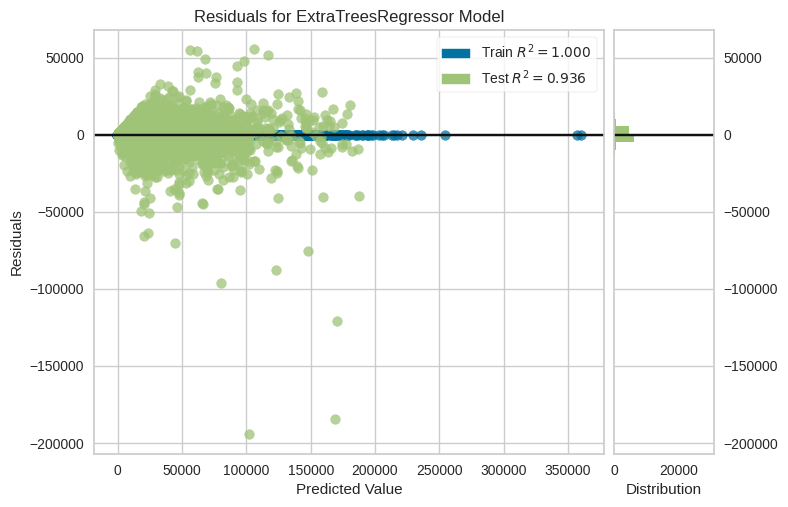

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

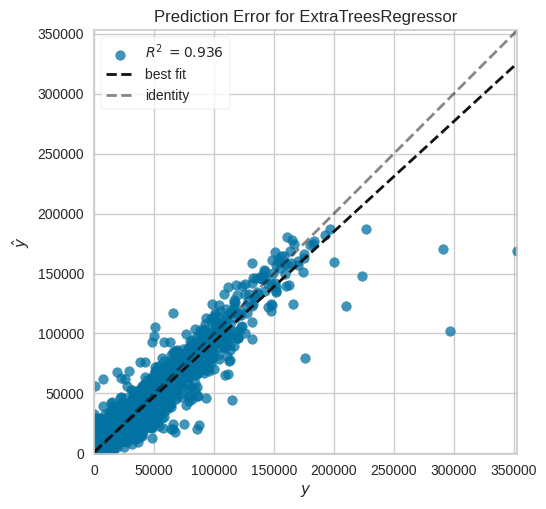

In [ ]:
# plot errors
plot_model(best, plot = 'error')

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
%matplotlib inline
evaluate_model(best)

- It's suggested to conduct a final check by predicting the test/hold-out set and analyzing the evaluation metrics before finalizing the model.
- The information grid in shows that 30% of the data has been set aside as a test/hold-out sample.
- The evaluation metrics observed so far are cross-validated results obtained only from the training set (70%).
- The final trained model, stored in the "best" variable, will be used to predict the hold-out sample.
- The performance of the model will be evaluated by comparing the metrics of the hold-out sample with the cross-validation results to identify any significant differences.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

- The R2 value for the test/hold-out set stands at 0.9361, while the best model's cross-validation (CV) results have an R2 of 0.8884. This difference is not considered substantial.
- A large discrepancy between the test/hold-out and CV results typically signals over-fitting. However, other factors could also cause this, necessitating further exploration.
- Given the current circumstances, we will proceed to finalize the model and apply it to predict unseen data.

In [ ]:
# predict model on new_data
predictions = predict_model(best, data = strat_test_set)
predictions.head()

Store Dept IsHoliday  Temperature  Fuel_Price    MarkDown1  MarkDown2  \
403051    43   82         0    -3.277778       3.467     0.000000   0.000000   
32771      4   24         0    -3.228395       3.263  4799.229980  47.549999   
288034    30   11         0   -12.049383       3.159     0.000000   0.000000   
98886     11    8         1   -13.885802       3.022     0.000000   0.000000   
370301    39   94         0    -3.978395       3.717  9997.120117   4.000000   

        MarkDown3    MarkDown4     MarkDown5  ...  Year  \
403051   0.000000     0.000000      0.000000  ...  2011   
32771   30.559999   634.780029   4648.910156  ...  2012   
288034  11.100000     0.000000    602.440002  ...  2011   
98886    0.000000     0.000000      0.000000  ...  2011   
370301  67.580002  1208.439941  18054.349609  ...  2012   

        Days_to_Thansksgiving Days_to_Christmas  SuperBowlWeek LaborDay  \
403051                     62                92              0        0   
32771                     127               157              0        0   
288034                    -22                 8              0        0   
98886                     286               316              1        0   
370301                     71               101              0        0   

       Tranksgiving Christmas  MarkdownsSum  Weekly_Sales  prediction_label  
403051            0         0      0.000000   6319.979980       7518.757754  
32771             0         0  10161.030273  11598.179688       9398.517231  
288034            0         0      0.000000   1031.089966        741.438795  
98886             0         0      0.000000  32839.761719      33418.857695  
370301            0         0  29331.490234  63957.511719      62463.116641  

[5 rows x 27 columns]

# **Prophet**

In [ ]:
data_train_prophet = data_train_prophet.groupby(["Date"]).agg({"Weekly_Sales":"sum"}).reset_index()

In [ ]:
data_train_prophet.rename(columns = {"Date":"ds","Weekly_Sales":"y"},inplace=True)

In [ ]:
df_holiday = pd.DataFrame({"calendar_date":[pd.to_datetime("2010-12")]})

In [ ]:
x_train_prophet = data_train_prophet[data_train_prophet["ds"]<pd.to_datetime("2011-10-01")]
x_test_prophet = data_train_prophet[data_train_prophet["ds"]>pd.to_datetime("2011-10-01")]

In [ ]:
x_train_prophet.head()

ds            y
0 2010-02-05  49750740.50
1 2010-02-12  48336677.63
2 2010-02-19  48276993.78
3 2010-02-26  43968571.13
4 2010-03-05  46871470.30

In [ ]:
x_test_prophet.head()

ds            y
87 2011-10-07  47211688.36
88 2011-10-14  44374820.30
89 2011-10-21  45818953.44
90 2011-10-28  45855821.05
91 2011-11-04  48655544.30

In [ ]:
# Plot the actual values vs the forecasted values
fig = go.Figure()
# Actual values
fig.add_trace(go.Scatter(x=x_train_prophet['ds'], y=x_train_prophet['y'], mode='lines', name='Actual'))
fig.show()

In [ ]:
# Plot the actual values vs the forecasted values
fig = go.Figure()
# Actual values
fig.add_trace(go.Scatter(x=x_test_prophet['ds'], y=x_test_prophet['y'], mode='lines', name='Actual'))
fig.show()

In [ ]:
christmas_date = [pd.to_datetime("2010-12-24"),pd.to_datetime("2011-12-23"),pd.to_datetime("2012-12-25"),pd.to_datetime("2013-12-25")]
christams_holiday = ["Christmas"]*len(christmas_date)
thanksgiving_date = [pd.to_datetime("2010-11-25"),pd.to_datetime("2011-11-25"),pd.to_datetime("2012-11-24"),pd.to_datetime("2013-11-24")]
thanksgiving_holiday = ["ThanksGiving"]*len(thanksgiving_date)

all_dates = christmas_date + thanksgiving_date
all_holidays = christams_holiday+thanksgiving_holiday

df_holiday = pd.DataFrame({"ds":all_dates,"holiday":all_holidays,"lower_window":-7,"upper_window":0})
df_holiday

ds       holiday  lower_window  upper_window
0 2010-12-24     Christmas            -7             0
1 2011-12-23     Christmas            -7             0
2 2012-12-25     Christmas            -7             0
3 2013-12-25     Christmas            -7             0
4 2010-11-25  ThanksGiving            -7             0
5 2011-11-25  ThanksGiving            -7             0
6 2012-11-24  ThanksGiving            -7             0
7 2013-11-24  ThanksGiving            -7             0

In [ ]:
from prophet import Prophet

prophet_model = Prophet(holidays=df_holiday)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5) # Monthly seasonality
prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=10) # Yearly seasonality

prophet_model.fit(x_train_prophet)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1x8s_xzw/ykuoe9qu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1x8s_xzw/f3gtif7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75426', 'data', 'file=/tmp/tmp1x8s_xzw/ykuoe9qu.json', 'init=/tmp/tmp1x8s_xzw/f3gtif7d.json', 'output', 'file=/tmp/tmp1x8s_xzw/prophet_modelmjop7dsq/prophet_model-20240406054142.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:41:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:42 - cmdstanpy - INFO - Chain [1] d

In [ ]:
# Make predictions on the testing set
forecast = prophet_model.predict(x_test_prophet.drop(columns='y'))

# Plot the actual values vs the forecasted values
fig = go.Figure()
# Actual values
fig.add_trace(go.Scatter(x=x_test_prophet['ds'], y=x_test_prophet['y'], mode='lines', name='Actual'))

# Forecasted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

fig.show()